In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random
from math import pi, sqrt
from scipy.special import erf 
import os

## hadamard

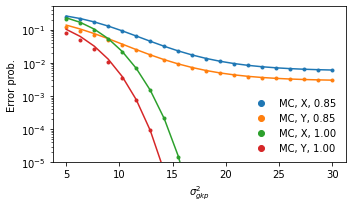

In [57]:
repeat = 24
η_list = [0.85,1]# np.array([0.75,0.85,0.95,1.0])
# η_list = np.array([0.75,0.85,0.95,1.0])


plt.figure(1,figsize=(5,3))

def success_prob_calc(Δ):
    return (erf( (pi**0.5)/(2*Δ) )- erf(-(pi**0.5)/(2*Δ) )  )/2


for i_n, η in enumerate(η_list):
    σm2 = (1-η)/(2*η)
    first = True
    for i_rep in range(repeat):
        # fname = "data_hadamard/" + "sc_eq_sgkp_p_%.2f_i_%d.npz" % (η,i_rep)
        fname = "data_hadamard/" + "sc_0_p_%.2f_i_%d.npz" % (η,i_rep)

        if os.path.exists(fname):
            npz_file = np.load(fname)
            σ2_list, probX_mc, probY_mc, probZ_mc, Nrep = npz_file['σ2_list'], npz_file['probX_mc'], npz_file['probY_mc'], npz_file['probZ_mc'], npz_file['Nrep']

            if first :
                first = False
                probX_avg = np.zeros(len(σ2_list))
                probY_avg = np.zeros(len(σ2_list))
                probZ_avg = np.zeros(len(σ2_list))
                Ntot = 0
                prob_X = np.zeros((len(η_list),len(σ2_list)))
                prob_Y = np.zeros((len(η_list),len(σ2_list)))

            probX_avg += probX_mc*Nrep
            probY_avg += probY_mc*Nrep
            probZ_avg += probZ_mc*Nrep
            Ntot += Nrep
    for i_s, σgkp2 in enumerate(σ2_list):
        σc2 = 0*σgkp2
        σn = (2**0.5) * ( 3*σgkp2+ 11/3*σc2 + σm2)**0.5
        Xerr = 1-success_prob_calc(σn)
        σn = (2**0.5) * ( (3*σgkp2+ 11/3*σc2+ σgkp2+ 2*σc2)/2 + σm2)**0.5
        Yerr = 1-success_prob_calc(σn)
        prob_X[i_n,i_s] = Xerr*(1-Yerr)**3+ Yerr*(1-Xerr)*(1-Yerr)**2+ Yerr**2*(1-Xerr)*(1-Yerr)+ Xerr**3
        prob_Y[i_n,i_s] = Yerr*(1-Yerr)**2+ Yerr**2*(1-Yerr)
    plt.plot(-10*np.log10(2*σ2_list),prob_X[i_n,:],"-", color="C%d" % (2*i_n))
    plt.plot(-10*np.log10(2*σ2_list),prob_Y[i_n,:],"-", color="C%d" % (2*i_n+1))

    if not first:
        plt.plot(-10*np.log10(2*σ2_list),probX_avg/Ntot,".", color="C%d" % (2*i_n), linewidth=1,label="MC, X, %.2f" % (η))
        plt.plot(-10*np.log10(2*σ2_list),probY_avg/Ntot,".", color="C%d" % (2*i_n+1), linewidth=1,label="MC, Y, %.2f" % (η))
        # plt.plot(-10*np.log10(2*σ2_list),probZ_avg/Ntot,".", color="C%d" % (i_n+2), linewidth=1,label="MC, Z, %.2f" % (η))

plt.yscale("log")
# plt.xscale("log")
plt.ylim(1e-5,5e-1)
# plt.xlim(4,31)
plt.xlabel(r"$σ^2_{gkp}$")
plt.ylabel("Error prob.")
# plt.grid()
plt.legend(frameon=False,markerscale=2)
plt.tight_layout()
# plt.grid()
# plt.savefig("figs/qdot-threshold.pdf")
plt.show()

## S gate

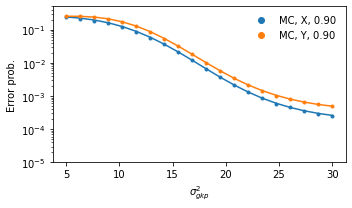

In [50]:
repeat = 24
η_list =  [0.9]#np.array([0.75,0.85,0.95,1.0])
# η_list = np.array([0.75,0.85,0.95,1.0])

plt.figure(1,figsize=(5,3))

def success_prob_calc(Δ):
    return (erf( (pi**0.5)/(2*Δ) )- erf(-(pi**0.5)/(2*Δ) )  )/2


for i_n, η in enumerate(η_list):
    σm2 = (1-η)/(2*η)
    first = True
    for i_rep in range(repeat):
        fname = "data_Sgate/" + "sc_eq_sgkp_p_%.2f_i_%d.npz" % (η,i_rep)

        if os.path.exists(fname):
            npz_file = np.load(fname)
            σ2_list, probX_mc, probY_mc, probZ_mc, Nrep = npz_file['σ2_list'], npz_file['probX_mc'], npz_file['probY_mc'], npz_file['probZ_mc'], npz_file['Nrep']

            if first :
                first = False
                probX_avg = np.zeros(len(σ2_list))
                probY_avg = np.zeros(len(σ2_list))
                probZ_avg = np.zeros(len(σ2_list))
                Ntot = 0
                prob_X = np.zeros((len(η_list),len(σ2_list)))
                prob_Z = np.zeros((len(η_list),len(σ2_list)))

            probX_avg += probX_mc*Nrep
            probY_avg += probY_mc*Nrep
            probZ_avg += probZ_mc*Nrep
            Ntot += Nrep
    for i_s, σgkp2 in enumerate(σ2_list):
        σc2 = σgkp2
        σn = (2**0.5) * ( 3*σgkp2+ 11/3*σc2 + σm2)**0.5
        Xerr = 1-success_prob_calc(σn)
        σn = (2**0.5) * ( (3*σgkp2+ 11/3*σc2+ σgkp2+ 2*σc2)/2 + σm2)**0.5
        Yerr = 1-success_prob_calc(σn)
        prob_X[i_n,i_s] = Xerr*(1-Xerr)
        prob_Z[i_n,i_s] = Xerr**2 *(Xerr*Yerr+(1-Xerr)*(1-Yerr))+ (1-Xerr)**2 *(Xerr*(1-Yerr)+Yerr*(1-Xerr))
    plt.plot(-10*np.log10(2*σ2_list),prob_X[i_n,:],"-", color="C%d" % (2*i_n))
    plt.plot(-10*np.log10(2*σ2_list),prob_Z[i_n,:],"-", color="C%d" % (2*i_n+1))

    if not first:
        plt.plot(-10*np.log10(2*σ2_list),probX_avg/Ntot,".", color="C%d" % (2*i_n), linewidth=1,label="MC, X, %.2f" % (η))
        plt.plot(-10*np.log10(2*σ2_list),probZ_avg/Ntot,".", color="C%d" % (2*i_n+1), linewidth=1,label="MC, Y, %.2f" % (η))
        # plt.plot(-10*np.log10(2*σ2_list),probZ_avg/Ntot,".", color="C%d" % (i_n+2), linewidth=1,label="MC, Z, %.2f" % (η))

plt.yscale("log")
# plt.xscale("log")
plt.ylim(1e-5,5e-1)
# plt.xlim(4,31)
plt.xlabel(r"$σ^2_{gkp}$")
plt.ylabel("Error prob.")
# plt.grid()
plt.legend(frameon=False,markerscale=2)
plt.tight_layout()
# plt.grid()
# plt.savefig("figs/qdot-threshold.pdf")
plt.show()